# Boston Airbnb Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data loading and cleaning

### Dataset: Listing

In [3]:
listings = pd.read_csv("../data/listings.csv")
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [5]:
# choose meaningful columns 
listings = listings[['id','host_response_time', 'host_response_rate','host_is_superhost','host_neighbourhood','property_type', 'room_type', 'accommodates','price', 'security_deposit',
       'cleaning_fee','minimum_nights','review_scores_rating','cancellation_policy']]

In [6]:
# Convert string of pecentages to floats
listings.host_response_rate = listings.host_response_rate.str.replace('%','')
listings.host_response_rate = listings.host_response_rate.astype(float)/100
listings.host_response_rate.head()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
Name: host_response_rate, dtype: float64

In [7]:
# Convert string of prices to floats
listings.price=listings.price.str.replace('$','')
listings.price=listings.price.str.replace(',','').astype(float)

listings.security_deposit=listings.security_deposit.str.replace('$','')
listings.security_deposit=listings.security_deposit.str.replace(',','').astype(float)

listings.cleaning_fee=listings.cleaning_fee.str.replace('$','')
listings.cleaning_fee=listings.cleaning_fee.str.replace(',','').astype(float)

listings.price.head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [8]:
listings.isnull().any() 

id                      False
host_response_time       True
host_response_rate       True
host_is_superhost       False
host_neighbourhood       True
property_type            True
room_type               False
accommodates            False
price                   False
security_deposit         True
cleaning_fee             True
minimum_nights          False
review_scores_rating     True
cancellation_policy     False
dtype: bool

In [9]:
# fill the null numerical data with mean
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mean())
listings['security_deposit'] = listings['security_deposit'].fillna(listings['security_deposit'].mean())
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(listings['cleaning_fee'].mean())
listings['review_scores_rating'] = listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean())

In [10]:
# fill null categorical data with mode
listings['host_response_time'] = listings['host_response_time'].fillna(listings['host_response_time'][listings['host_response_time'].notnull()].mode()[0])
listings['host_neighbourhood'] = listings['host_neighbourhood'].fillna(listings['host_neighbourhood'][listings['host_neighbourhood'].notnull()].mode()[0])
listings['property_type'] = listings['property_type'].fillna(listings['property_type'][listings['property_type'].notnull()].mode()[0])

In [11]:
listings.isnull().any() 

id                      False
host_response_time      False
host_response_rate      False
host_is_superhost       False
host_neighbourhood      False
property_type           False
room_type               False
accommodates            False
price                   False
security_deposit        False
cleaning_fee            False
minimum_nights          False
review_scores_rating    False
cancellation_policy     False
dtype: bool

In [12]:
listings.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,cancellation_policy
0,12147973,within an hour,0.949891,f,Roslindale,House,Entire home/apt,4,250.0,324.698212,35.000000,2,91.916667,moderate
1,3075044,within an hour,1.000000,f,Roslindale,Apartment,Private room,2,65.0,95.000000,10.000000,2,94.000000,moderate
2,6976,within a few hours,1.000000,t,Roslindale,Apartment,Private room,2,65.0,324.698212,68.380145,3,98.000000,moderate
3,1436513,within a few hours,1.000000,f,Allston-Brighton,House,Private room,4,75.0,100.000000,50.000000,1,100.000000,moderate
4,7651065,within an hour,1.000000,t,Roslindale,House,Private room,2,79.0,324.698212,15.000000,2,99.000000,flexible


### Dataset: calendar

In [13]:
calendar = pd.read_csv('../data/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [14]:
calendar.shape

(1308890, 4)

In [15]:
calendar['available'].value_counts(dropna=False)

f    665853
t    643037
Name: available, dtype: int64

In [16]:
calendar.date.min()

'2016-09-06'

In [17]:
calendar.date.max()

'2017-09-05'

In [18]:
calendar.price = calendar.price.str.replace('$','')
calendar.price = calendar.price.str.replace(',','').astype(float)

calendar['date'] = pd.to_datetime(calendar['date'], format='%Y-%m-%d')
calendar['date'].head()

0   2017-09-05
1   2017-09-04
2   2017-09-03
3   2017-09-02
4   2017-09-01
Name: date, dtype: datetime64[ns]

In [19]:
calendar.isnull().any() 

listing_id    False
date          False
available     False
price          True
dtype: bool

In [31]:
# finding the matched price in table listing and fill the null value
def fill_price(calendar,listings):
    calendar['price'] = calendar['price'].fillna(0)
    
    price = calendar['price']
    listing_id = calendar['listing_id']
    num = len(price)
    
    for i in range(0,num):
        if price[i] == 0:
            list_id = listing_id[i]
            list_price = listings[listings['id'] == list_id].price

In [20]:
calendar = pd.read_csv('../data/new_calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017/9/5,f,250
1,12147973,2017/9/4,f,250
2,12147973,2017/9/3,f,250
3,12147973,2017/9/2,f,250
4,12147973,2017/9/1,f,250


In [21]:
calendar.isnull().any() 

listing_id    False
date          False
available     False
price         False
dtype: bool

### Dataset: reviews

In [22]:
reviews = pd.read_csv('../data/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [23]:
reviews.shape

(68275, 6)

In [24]:
reviews.date.min()

'2009-03-21'

In [25]:
reviews.date.max()

'2016-09-06'

In [26]:
reviews['date'] = pd.to_datetime(reviews['date'], format='%Y-%m-%d')

In [27]:
reviews.isnull().any()

listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool

## Price variation

In [39]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017/9/5,f,250
1,12147973,2017/9/4,f,250
2,12147973,2017/9/3,f,250
3,12147973,2017/9/2,f,250
4,12147973,2017/9/1,f,250


In [40]:
# transform date into only year with month
calendar['date'] = pd.to_datetime(calendar['date'],format= "%Y-%m-%d")
calendar['date'] = calendar['date'].apply(lambda x:x.strftime("%Y-%m"))
calendar['date'].head()

0    2017-09
1    2017-09
2    2017-09
3    2017-09
4    2017-09
Name: date, dtype: object

In [41]:
# calculate the average price for month
calendar_month = calendar.groupby('date',as_index = False).agg({'listing_id': 'count', 'price': 'sum'})
calendar_month.rename(columns={'listing_id': 'amount', 'price': 'sum_month_price'},inplace=True)
calendar_month['average'] = calendar_month['sum_month_price']/calendar_month['amount']
del calendar_month['amount']
del calendar_month['sum_month_price']
calendar_month

,date,average
0,2016-09,194.945432
1,2016-10,200.697131
2,2016-11,192.132926
3,2016-12,185.543997
4,2017-01,181.617686
5,2017-02,181.841244
6,2017-03,183.227030
7,2017-04,191.203690
8,2017-05,189.997844
9,2017-06,191.222532


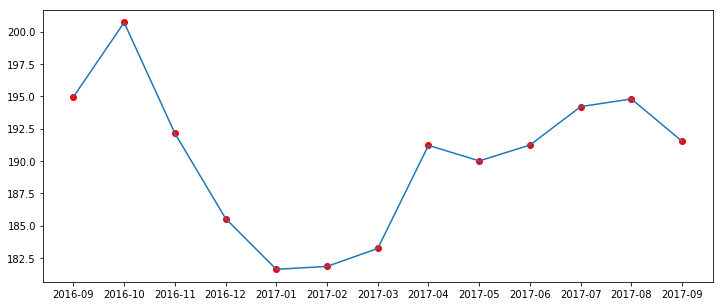

In [42]:
x = calendar_month.date
y = calendar_month.average
fig = plt.figure(figsize=(12,5))
plt.scatter(x,y, color = 'red')
plt.plot(x,y)

The price from October to January continuously decreased and reached the lowest postion. It started to increase significantly at March to April and reached the highest price at July and August. This trend is quite reasonable, because boston's weather starts to turn cold at October and be quite frozen around January. So few people will choose to come to boston in winter for a trip. But after March, the weather starts to turn warm and number of visitors may meet a peek at July and August because of summer vacation.

## Revenue

### Revenue = review_num_2015 × listing_price × min_night

The number of reviews and minimum_nights will serve as a conservartive estimate of the number of bookings and length of stay respectively. Even though prices do change slightly throughout the years as reflected in the calendar csv, the constant price from listing was used for simplicity. Since we will be working with estimated revenues from 2015 and the listing prices were obtained during August 2016, this assumption should be acceptable. Overall, the estimated revenue will be relatively conservative.

The primary purpose will be to analyze the model results and identify which are the most important factors in obtaining higher revenues. Hosts with 0 revenues were removed, since it is likely that they are not actively listing their properties, as evident by the huge proportion of listings with no availabiity.

In [28]:
reviews_2015 = reviews[(reviews.date >= '2015-01-01') & (reviews.date < '2016-01-01')]

# calculate each property's review number in 2015
reviews_2015_agg = reviews_2015.groupby(['listing_id'],as_index=False).agg({'id':'count'})
reviews_2015_agg.rename(columns={"id": "number_of_reviews_2015"},inplace=True)
reviews_2015_agg.head()

,listing_id,number_of_reviews_2015
0,3353,8
1,5506,3
2,6695,2
3,6976,7
4,8792,7


In [29]:
# merge the review number into datatset listing
listing_agg = pd.merge(listings, reviews_2015_agg, how='inner', left_on='id',right_on='listing_id')
del listing_agg['listing_id']

# calculate revenue
listing_agg['revenue'] = listing_agg['price']*listing_agg['minimum_nights']*listing_agg['number_of_reviews_2015']
listing_agg.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,cancellation_policy,number_of_reviews_2015,revenue
0,3075044,within an hour,1.00,f,Roslindale,Apartment,Private room,2,65.0,95.000000,10.000000,2,94.0,moderate,17,2210.0
1,6976,within a few hours,1.00,t,Roslindale,Apartment,Private room,2,65.0,324.698212,68.380145,3,98.0,moderate,7,1365.0
2,7651065,within an hour,1.00,t,Roslindale,House,Private room,2,79.0,324.698212,15.000000,2,99.0,flexible,14,2212.0
3,5706985,within an hour,0.98,f,Roslindale,Apartment,Entire home/apt,3,100.0,324.698212,68.380145,1,90.0,strict,17,1700.0
4,2843445,within a few hours,1.00,t,Roslindale,House,Private room,2,75.0,324.698212,10.000000,1,96.0,moderate,41,3075.0


In [30]:
listing_agg.to_csv('listing_agg.csv')

In [31]:
listing_agg.columns

Index(['id', 'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'property_type', 'room_type', 'accommodates',
       'price', 'security_deposit', 'cleaning_fee', 'minimum_nights',
       'review_scores_rating', 'cancellation_policy', 'number_of_reviews_2015',
       'revenue'],
      dtype='object')

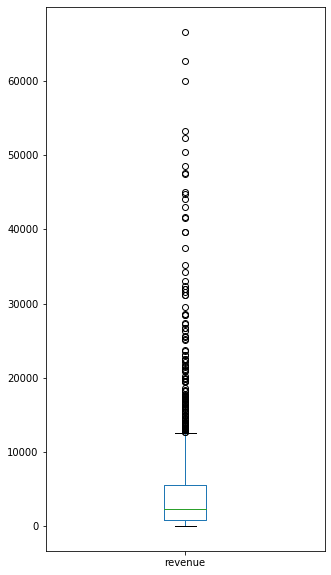

In [32]:
fig = plt.figure(figsize=(5,10))
listing_agg['revenue'][listing_agg['revenue']<100000].plot(kind = 'box')

In [33]:
listing_agg['revenue'].describe()

count      1571.000000
mean       5068.504774
std       10430.361009
min          32.000000
25%         880.000000
50%        2290.000000
75%        5625.000000
max      224224.000000
Name: revenue, dtype: float64

In 2015, the average estimated revenue for a Boston Airbnb host was 5068 dollars, but revenue disparity was prevalent. 50% of the hosts gained less than 2290 dollars in revenues, while the top Airbnb host in Boston received over 224,000 dollars of revenue in 2015! In fact, 4 of the highest hosts received at least 100,000 dollars in revenue during that year.

In [34]:
listing_agg.sort_values(by = 'revenue', ascending = False).head()

,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,cancellation_policy,number_of_reviews_2015,revenue
151,3693850,within an hour,1.00,t,Jamaica Plain,Condominium,Private room,1,88.0,324.698212,68.380145,28,96.0,moderate,91,224224.0
207,5882411,within an hour,1.00,t,Jamaica Plain,Condominium,Private room,1,88.0,324.698212,68.380145,28,96.0,moderate,65,160160.0
877,6432655,within a day,0.60,f,Beacon Hill,Apartment,Entire home/apt,2,150.0,324.698212,70.000000,30,91.0,flexible,24,108000.0
643,2881388,within an hour,1.00,t,Back Bay,Apartment,Entire home/apt,7,695.0,600.000000,150.000000,3,96.0,strict,48,100080.0
1182,3412990,within a few hours,0.95,f,Allston-Brighton,House,Private room,2,60.0,324.698212,10.000000,30,90.0,strict,37,66600.0


Through the table above, we can see that most of these top host of revenue has a high score rating, all of them are higher than 90. Also their minmum nights are very high, except the forth one. But the forth one has a really high price. So we might think the revenue is  quite relevant to the score rating, minmum night and price. For figure out which features are the most important for revenue, we build a regressor tree to get feature importance.

## Rgression

### Data preprocessing

In [35]:
listing_agg.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,property_type,room_type,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,cancellation_policy,number_of_reviews_2015,revenue
0,3075044,within an hour,1.00,f,Roslindale,Apartment,Private room,2,65.0,95.000000,10.000000,2,94.0,moderate,17,2210.0
1,6976,within a few hours,1.00,t,Roslindale,Apartment,Private room,2,65.0,324.698212,68.380145,3,98.0,moderate,7,1365.0
2,7651065,within an hour,1.00,t,Roslindale,House,Private room,2,79.0,324.698212,15.000000,2,99.0,flexible,14,2212.0
3,5706985,within an hour,0.98,f,Roslindale,Apartment,Entire home/apt,3,100.0,324.698212,68.380145,1,90.0,strict,17,1700.0
4,2843445,within a few hours,1.00,t,Roslindale,House,Private room,2,75.0,324.698212,10.000000,1,96.0,moderate,41,3075.0


In [36]:
df_regress = listing_agg.copy(deep = True)

In [37]:
del df_regress['id']
del df_regress['number_of_reviews_2015']

In [38]:
# one hot encoding for categorical data
host_response_time = pd.get_dummies(df_regress['host_response_time'])
host_is_superhost = pd.get_dummies(df_regress['host_is_superhost'])
property_type = pd.get_dummies(df_regress['property_type'])
room_type = pd.get_dummies(df_regress['room_type'])
host_neighbourhood = pd.get_dummies(df_regress['host_neighbourhood'])
cancellation_policy = pd.get_dummies(df_regress['cancellation_policy'])
# df_regress[df_regress['host_is_superhost']== 'f'] = 0
# df_regress[df_regress['host_is_superhost']== 't'] = 1

In [39]:
del df_regress['host_response_time']
del df_regress['host_is_superhost']
del df_regress['property_type']
del df_regress['room_type']
del df_regress['host_neighbourhood']
del df_regress['cancellation_policy']

#normalization for numerical data
df_regress = df_regress.apply(lambda x : (x-np.mean(x))/np.std(x))
df_regress.head()

,host_response_rate,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,revenue
0,0.412207,-0.576188,-0.937159,-0.991328,-1.299933,-0.112751,0.270739,-0.274143
1,0.412207,-0.576188,-0.937159,-0.025385,-0.025460,-0.024582,0.756541,-0.355183
2,0.412207,-0.576188,-0.812475,-0.025385,-1.190780,-0.112751,0.877992,-0.273952
3,0.210649,-0.034482,-0.625447,-0.025385,-0.025460,-0.200921,-0.215064,-0.323055
4,0.412207,-0.576188,-0.848099,-0.025385,-1.299933,-0.200921,0.513640,-0.191186


In [40]:
df_regress = pd.concat([host_response_time,host_is_superhost,property_type,room_type,host_neighbourhood,cancellation_policy,df_regress], axis=1, join='inner', ignore_index=False)
df_regress.rename(columns={"f": "not_superhost", "t":"is_spuer_host"},inplace=True)
del df_regress['not_superhost']
df_regress.head()

,a few days or more,within a day,within a few hours,within an hour,is_spuer_host,Apartment,Bed & Breakfast,Boat,Condominium,House,...,strict,super_strict_30,host_response_rate,accommodates,price,security_deposit,cleaning_fee,minimum_nights,review_scores_rating,revenue
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0.412207,-0.576188,-0.937159,-0.991328,-1.299933,-0.112751,0.270739,-0.274143
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0.412207,-0.576188,-0.937159,-0.025385,-0.025460,-0.024582,0.756541,-0.355183
2,0,0,0,1,1,0,0,0,0,1,...,0,0,0.412207,-0.576188,-0.812475,-0.025385,-1.190780,-0.112751,0.877992,-0.273952
3,0,0,0,1,0,1,0,0,0,0,...,1,0,0.210649,-0.034482,-0.625447,-0.025385,-0.025460,-0.200921,-0.215064,-0.323055
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0.412207,-0.576188,-0.848099,-0.025385,-1.299933,-0.200921,0.513640,-0.191186


### RandomForest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score

In [43]:
# Split features and label
df_x = df_regress.iloc[:,0:64]
df_y = df_regress.iloc[:,64]

In [51]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

# Choose random forest regressor with 10 tress
rf = RandomForestRegressor(n_estimators= 10)

# Train the model on training data
rf.fit(X_train,y_train)

# Assess the model
rf.score(X_test, y_test)

0.7024132191676677

In [52]:
importance = rf.feature_importances_
features = df_regress.columns[0:65]
indices = np.argsort(importance)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features[indices[f]], importance[indices[f]]))

 1) minimum_nights                 0.255209
 2) price                          0.167260
 3) moderate                       0.086956
 4) Jamaica Plain                  0.074361
 5) host_response_rate             0.054181
 6) review_scores_rating           0.041549
 7) is_spuer_host                  0.037677
 8) within an hour                 0.035759
 9) Back Bay                       0.028453
10) security_deposit               0.027343
11) cleaning_fee                   0.027095
12) Condominium                    0.026109
13) accommodates                   0.020666
14) Private room                   0.013947
15) East Boston                    0.013111
16) Beacon Hill                    0.009404
17) Entire home/apt                0.008762
18) North End                      0.008410
19) South End                      0.008389
20) strict                         0.006046
21) Charlestown                    0.005829
22) Allston-Brighton               0.005667
23) Roxbury                     

We can see the top 7 important features are minimum_nights, 'moderate'(cancellation policy), price, 'Jamaica Plain'(neighborhood), host_response_rate, review_scores_rating, is_spuer_host. It is really reasonalble that when price, score rate, response rate and minimum nights are higher and when the host is auper host, the revenue can be higher. And the result also indicates that people will also pay attention to the cancellation policy and prefer to moderate policy. 'Jamaica Plain' is one of the neighbourhood in boston and this result is a little bit suprised to us. We first thought Back bay will be the top in area but it is the eighth important feature, the second important area.

### How should we writing our listing's name to get higher revenue?


We are going to build two clouds in order to compare the names of listings. In other words, we want to figure out what words are more prone to attract customers.

In [81]:
import string
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud,ImageColorGenerator

In [87]:
df_word = pd.merge(listings, listing_agg, how='inner', left_on='id',right_on='id')
df_word_head= df_word.sort_values('revenue',ascending= False).head(50)

In [88]:
def generate_wordcloud(df, save_file_name):
    punctuations = string.punctuation
    english_stopwords = stopwords.words("english")
    name_text=''
    for index, row in df.iterrows():
        name_text += " "
        name_text += row['name']
    name_text = nltk.word_tokenize(name_text)
    # Remove, punctuations, stopwords and numbers
    name_text = [word.lower() for word in name_text if word not in punctuations \
                 if not word.isdigit() if word not in english_stopwords]
    wnl = nltk.WordNetLemmatizer()
    name_text = [wnl.lemmatize(word) for word in name_text]
    name_text = ' '.join(name_text)
    name_wordcloud = WordCloud(width=1000,height=500, background_color='white',\
                           max_words=200, random_state=100).generate(name_text)
    plt.figure(figsize=(15,10));
    plt.imshow(name_wordcloud);
    plt.axis("off");
    plt.show();
    name_wordcloud.to_file(save_file_name)

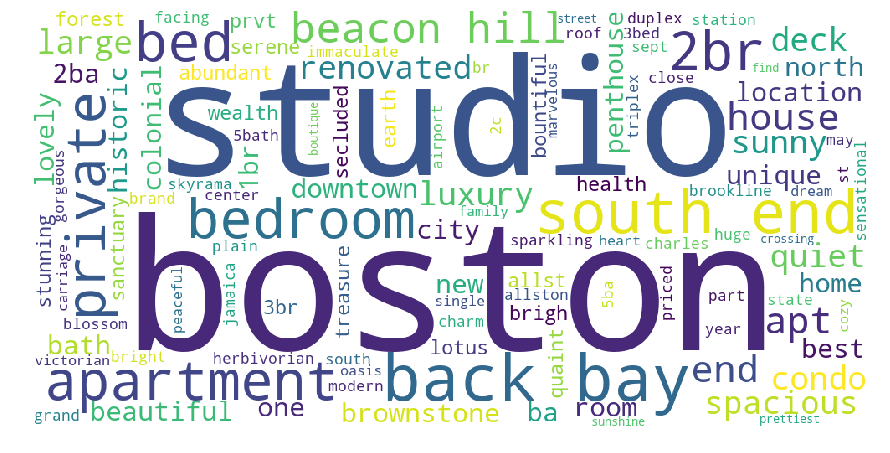

In [89]:
generate_wordcloud(df_word_head, "boston_name_top_50_wordcloud.jpeg")

In [91]:
df_word_tail= df_word.sort_values('revenue',ascending= False).tail(50)

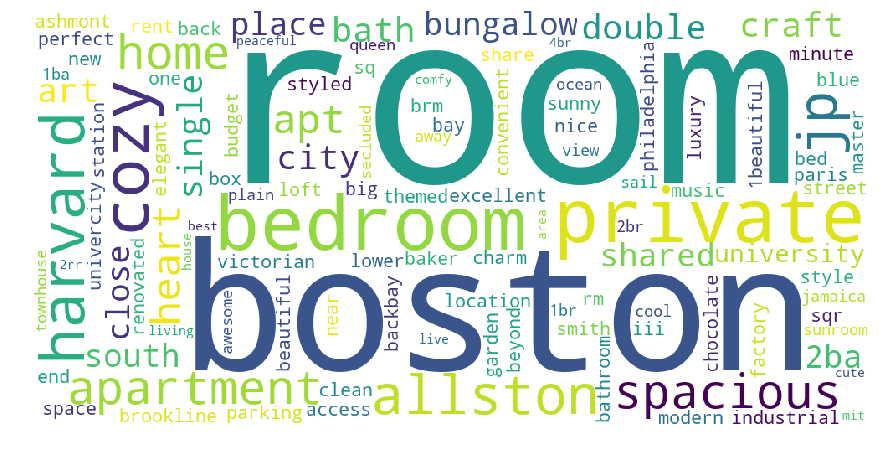

In [92]:
generate_wordcloud(df_word_tail, "boston_name_last_50_wordcloud.jpeg")